## <font color=FF4455>OSA Regression Examples</font>
---


### Machine Learning LAB
### *ETSIT - UPM*
---


# Import the OSA data for REGRESSION on the IAH into a Pandas Dataframe OSA_df
OSA_Regression.xlsx




In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving OSA_Regression.xlsx to OSA_Regression.xlsx
User uploaded file "OSA_Regression.xlsx" with length 28966 bytes


In [3]:
# Import pandas
import pandas as pd

# Read OSA data into OSA_df
OSA_df = pd.read_excel("OSA_Regression.xlsx", sheet_name='Hoja1')


In [4]:
OSA_df.head(10)

,IAH,Weight,Height,Cervical,Gender,Age,BMI
0,29.6,119,174,48.0,0,56,39.305060
1,19.7,78,168,42.0,0,39,27.636054
2,9.0,80,173,40.0,0,32,26.729927
3,2.0,109,190,42.0,0,32,30.193906
4,34.0,86,169,42.0,0,39,30.110991
5,60.0,145,172,44.0,0,47,49.012980
6,22.0,72,165,42.0,0,40,26.446281
7,11.0,80,180,38.0,0,28,24.691358
8,3.7,90,180,40.0,0,36,27.777778
9,7.0,50,158,35.0,1,50,20.028842


In [5]:
OSA_df.describe()

,IAH,Weight,Height,Cervical,Gender,Age,BMI
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,20.147346,87.704508,171.168614,40.631886,0.285476,49.502504,29.891201
std,18.144753,18.412257,9.502857,3.969171,0.452018,12.349546,5.630683
min,0.000000,45.000000,144.000000,30.000000,0.000000,20.000000,18.590125
25%,6.400000,75.000000,165.000000,38.000000,0.000000,40.000000,26.070325
50%,14.300000,86.000000,171.000000,41.000000,0.000000,49.000000,28.734672
75%,30.000000,98.000000,178.000000,43.000000,1.000000,59.000000,32.770513
max,108.400000,165.000000,197.000000,53.000000,1.000000,88.000000,63.654952


# Prepare X and y for train and test


In [6]:
import numpy as np

features = ['Weight', 'Height', 'Cervical', 'BMI', 'Age']

X = np.array(OSA_df[features])

y = np.array(OSA_df['IAH'])

print('X shape:', X.shape, 'y shape: ', y.shape)

X shape: (599, 5) y shape:  (599,)


### Train and test data splitting

In [7]:
from sklearn.model_selection import train_test_split

## Example: Train 80% and Test 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of both sets.
print(X_train.shape)
print(X_test.shape)

(479, 5)
(120, 5)


# Training

In [8]:
# Fitting a linear regression

# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(X_train, y_train)


## Test

In [9]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate our predictions for the test set.
predictions = Trained_model.predict(X_test)

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, y_test)

MAE=mean_absolute_error(predictions, y_test)

Rsquared = r2_score(y_test, predictions)

print('Mean squared Error: ', MSE,
      '\nMean Absolute Error: ', MAE,
      '\nR-squared', Rsquared)

Mean squared Error:  227.40730468975048 
Mean Absolute Error:  11.106385068724016 
R-squared 0.21391525526091848


(array([29., 10., 30., 37., 61., 83., 77., 92., 49., 11.]),
 array([0.        , 0.46950109, 0.93900218, 1.40850327, 1.87800436,
        2.34750544, 2.81700653, 3.28650762, 3.75600871, 4.2255098 ,
        4.69501089]),
 <a list of 10 Patch objects>)

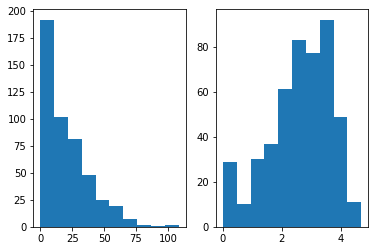

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
plt.hist(y_train)

plt.subplot(122)
plt.hist(np.log1p(y_train))

In [11]:
y_log_train = np.log1p(y_train)
y_log_test = np.log1p(y_test)

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Log_Trained_model=model.fit(X_train, y_log_train)

# Generate our predictions for the test set.
predictions_log = Log_Trained_model.predict(X_test)

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions_log, y_log_test)

MAE=mean_absolute_error(predictions_log, y_log_test)

Rsquared = r2_score(y_log_test, predictions_log)

print('Mean squared Error: ', MSE,
      '\nMean Absolute Error: ', MAE,
      '\nR-squared', Rsquared)

Mean squared Error:  0.6538322015647593 
Mean Absolute Error:  0.636271433506446 
R-squared 0.1461604958526329


In [12]:
# Compute error between our test predictions and the actual values.
INV_MSE=mean_squared_error(np.expm1(predictions_log), y_test)

INV_MAE=mean_absolute_error(np.expm1(predictions_log), y_test)

INV_Rsquared = r2_score(y_test, np.expm1(predictions_log))

print('INV Mean squared Error: ', INV_MSE,
      '\nINV Mean Absolute Error: ', INV_MAE,
      '\nINV R-squared', INV_Rsquared)

INV Mean squared Error:  243.64100121652615 
INV Mean Absolute Error:  10.5228449927134 
INV R-squared 0.15779981425592537


## Not try with: Poisson Regression
[Sklearn Poisson Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html
)

In [18]:
modelPoisson = linear_model.PoissonRegressor()

# Fit the model to the training data.
Poisson_Trained_model=modelPoisson.fit(X_train, y_train)

# Generate our predictions for the test set.
predictions_Poisson = Poisson_Trained_model.predict(X_test)

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions_Poisson, y_test)

MAE=mean_absolute_error(predictions_Poisson, y_test)


# Although it can be calculated, we do not have an R^2 in GLM !!!
# Rsquared = r2_score(y_test, predictions_Poisson)

# in GLM we use the Deviance to compare models
Deviance = Poisson_Trained_model.score(X_test, y_test)

print('Poisson Regression Results-----',
      '\nMean squared Error: ', MSE,
      '\nMean Absolute Error: ', MAE,
      '\nDeviance', Deviance)

Poisson Regression Results----- 
Mean squared Error:  221.4919969220596 
Mean Absolute Error:  10.983883125324827 
Deviance 0.23103663986510992


Some ideas:


* The deviance generalizes the Residual Sum of Squares (RSS) of the linear model. The generalization is driven by the likelihood and its equivalence with the RSS in the linear model

* R^2 (also MSE, MAE) in GLM has a different interpretation than in linear regression.
 - R^2 is not the percentage of variance explained by the model, but (as MSE, MAE) are measurements on how close predictions fit true values.
 - R^2 in GLM is not related to any correlation coefficient.
